<a href="https://colab.research.google.com/github/AimanAminuddin/DSA4212-Projects/blob/main/Build%20Image%20Classifier%20From%20Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Packages**

In [ ]:
%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True) 

import jax
import jax.numpy as jnp

import pylab as plt
import imageio
import os
import numpy as np 
from skimage.transform import rescale, resize, downscale_local_mean
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing CSV File**

In [ ]:
path_csv  = r"/content/drive/MyDrive/DSA4212/"
attribute = pd.read_csv(os.path.join(path_csv, "celeba.csv"))

In [ ]:
# print out the different attributes of each image 
attribute.keys()

Index(['Filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

**Import Images**

In [ ]:
!unzip /content/drive/MyDrive/DSA4212/img_celeba_small.zip

Archive:  /content/drive/MyDrive/DSA4212/img_celeba_small.zip
replace img_celeba_small/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Load the first 15000 Images**

In [ ]:
path = r"/content/img_celeba_small"
all_img = [f for f in os.listdir(path) 
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")]

# sort the images by alphabetical order 
# !!!! VERY IMPORTANT in order to be consistent with the labels contained in celeba.csv !!!!
all_img.sort()
nb_img = len(all_img)
print("Number of images:", nb_img)

#let us keep only the relevant attributes
attribute = attribute[:20000]

Number of images: 20000


In [ ]:
print(all_img)

['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000071.jpg', '0000

In [ ]:
n_img = 15000
img_array = np.zeros((n_img, 100,100))
for k in range(n_img):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    im = np.mean(im, axis=2) # average the last channel
    img_array[k,:,:] = im

**Unscaled Data Set**

In [ ]:
x_train = img_array.reshape(15000,(100*100))
y_train = attribute['Male'][0:15000].to_numpy()

In [ ]:
n_img = 5000 
last_img_array_testing = np.zeros((n_img, 100,100)) 
for k in range(15000,n_img+15000): 
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float) 
    im = resize(im, (100,100) ) 
    im = np.mean(im, axis=2) # average the last channel 
    last_img_array_testing[k-15000,:,:] = im

In [ ]:
x_test = last_img_array_testing.reshape(5000,(100*100))
y_test = attribute['Male'][15000:].to_numpy()

**Implenting Logistic Regression on Unscaled Data**

In [ ]:
np.random.seed(4212)

In [ ]:
# Parameter for logistic regression 
beta = np.random.normal(0,1/np.sqrt(100*100),size = (100*100))
print(beta)

[ 0.01952796 -0.00970296 -0.01125292 ...  0.00507152 -0.01599611
 -0.01067782]


In [ ]:
max(beta) # small due to small standard deviation 

0.041767492099691

**Sigmoid Function**

In [ ]:
def prediction(x,beta):
  return 1/(1 + jnp.exp(-jnp.dot(beta,x)))

**Predicting First Example**

In [ ]:
prediction(x_train[0],beta)

DeviceArray(1., dtype=float64)

**Loss at a Single Image**

In [ ]:
@jax.jit
def loss_single(beta,x,y):
  return jnp.log(1 + jnp.exp(-y * jnp.dot(x,beta)))

In [ ]:
loss_single(beta,x_train[0],y_train[0])

DeviceArray(110.49799178, dtype=float64)

**Vmapping on all Training Images**

In [ ]:
vmapped_logistic_loss = jax.vmap(loss_single,in_axes = (None,0,0))

In [ ]:
vmapped_logistic_loss(beta,x_train,y_train)

DeviceArray([110.49799178,   7.70415011,   0.        , ...,  62.52068856,
              35.04671716,  83.86470043], dtype=float64)

In [ ]:
@jax.jit
def all_logistic_loss(beta,x,y):
  return jnp.mean(vmapped_logistic_loss(beta,x,y))

In [ ]:
all_logistic_loss(beta,x_train,y_train)

DeviceArray(31.90663985, dtype=float64)

**Find Optimal $\beta$ with Gradient Descent**

In [ ]:
loss_value_and_grad =  jax.value_and_grad(all_logistic_loss)

In [ ]:
# find beta that minimizes logistic loss using gradient descent 
iters = 100 
learning_rate = 0.000001 
history = []
beta0 = beta 

for i in range(iters):
  value,gradient = loss_value_and_grad(beta0,x_train,y_train)
  beta0 -= gradient * learning_rate 
  history.append(value)

**Unscaled Data Gradient Descent**

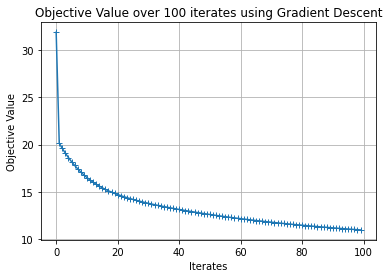

In [ ]:
plt.plot(history,"-+")
plt.title("Objective Value over 100 iterates using Gradient Descent")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")
plt.grid(True)

**Save Model**

---

Unscaled Gradient Descent

**Compute the accuracy of model on training/test data**

In [ ]:
prediction_vmapped = jax.vmap(prediction,(0,None))

**Training Data**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(x_train,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_train)

DeviceArray(0.59093333, dtype=float64)

**Test Data**

In [ ]:
y_predict = prediction_vmapped(x_test,beta0) > 0.5 
y_predict = 2*y_predict -1 
jnp.mean(y_predict == y_test)

# No signs of overfitting 

DeviceArray(0.5922, dtype=float64)

**Backtracking Line Search**

In [ ]:
iter = 100
initial = 1 
alpha = 0.5 
history1 = []
beta0 = beta 
learning_rate = 1 

for i in range(iter):
  value,gradient = loss_value_and_grad(beta0,x_train,y_train)
  d = -gradient 
  learning_rate *= 2 
  while (all_logistic_loss(beta0 + learning_rate *d,x_train,y_train) > all_logistic_loss(beta0,x_train,y_train) + learning_rate * alpha * jnp.dot(gradient,d)):
    learning_rate *= alpha 
  

  beta0 += learning_rate * d # next iterate 
  history1.append(value)


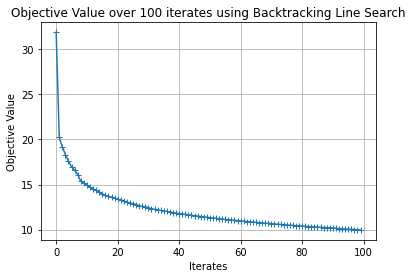

In [ ]:
plt.plot(history1,"-+")
plt.title("Objective Value over 100 iterates using Backtracking Line Search")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")
plt.grid(True)

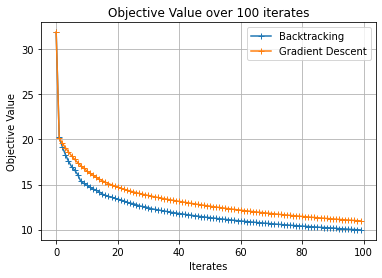

In [ ]:
plt.plot(history1,"-+")
plt.plot(history,"-+")
plt.title("Objective Value over 100 iterates")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")
plt.legend(['Backtracking', 'Gradient Descent'])
plt.grid(True)

**Accuracy on Training/Test Data**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(x_train,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_train)

DeviceArray(0.60626667, dtype=float64)

In [ ]:
y_predict = prediction_vmapped(x_test,beta0) > 0.5 
y_predict = 2*y_predict -1 
jnp.mean(y_predict == y_test)

# It seems backtracking has a higher test accuracy 
# then gradient descent 0.6112 VS 0.5992 

DeviceArray(0.6112, dtype=float64)

**Scaled Data**

In [ ]:
from sklearn.preprocessing import StandardScaler 
#scaling of X data ( both test and train) 
scaler = StandardScaler() 
# transform data 
scaled_x_train = scaler.fit_transform(x_train) 

In [ ]:
scaler = StandardScaler() 
scaled_x_test = scaler.fit_transform(x_test)

**Find Optimal $\beta$ with Gradient Descent**

In [ ]:
# find beta that minimizes logistic loss using gradient descent 
iters = 100 
learning_rate = 0.001 
scaled_history = []
beta0 = beta 

for i in range(iters):
  value,gradient = loss_value_and_grad(beta0,scaled_x_train,y_train)
  beta0 -= gradient * learning_rate 
  scaled_history.append(value)

In [ ]:
# learning rate of 0.01 result in the algorithm trajectory to fluctuate 
print(scaled_history)

[DeviceArray(0.75991002, dtype=float64), DeviceArray(0.73435821, dtype=float64), DeviceArray(0.71400374, dtype=float64), DeviceArray(0.69743114, dtype=float64), DeviceArray(0.68365099, dtype=float64), DeviceArray(0.67196058, dtype=float64), DeviceArray(0.66186161, dtype=float64), DeviceArray(0.6529991, dtype=float64), DeviceArray(0.64511729, dtype=float64), DeviceArray(0.63802894, dtype=float64), DeviceArray(0.63159439, dtype=float64), DeviceArray(0.62570742, dtype=float64), DeviceArray(0.62028562, dtype=float64), DeviceArray(0.6152639, dtype=float64), DeviceArray(0.6105899, dtype=float64), DeviceArray(0.60622088, dtype=float64), DeviceArray(0.60212143, dtype=float64), DeviceArray(0.59826186, dtype=float64), DeviceArray(0.59461699, dtype=float64), DeviceArray(0.59116528, dtype=float64), DeviceArray(0.58788814, dtype=float64), DeviceArray(0.58476939, dtype=float64), DeviceArray(0.5817949, dtype=float64), DeviceArray(0.57895221, dtype=float64), DeviceArray(0.57623033, dtype=float64), Dev

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

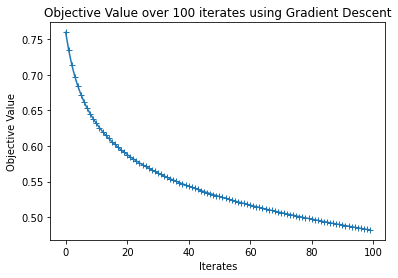

In [ ]:
plt.plot(scaled_history,"-+")
plt.title("Objective Value over 100 iterates using Gradient Descent")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")

**Compute accuracy of Training/Test Data**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(scaled_x_train,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_train) # significantly larger than that of unscaled data 

DeviceArray(0.77806667, dtype=float64)

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(scaled_x_test,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_test) # significantly larger than that of unscaled data 

# It seems that scaling data set improves accuracy of model 

DeviceArray(0.7796, dtype=float64)

**Backtracking on Scaled Data**

In [ ]:
iter = 200
initial = 1 
alpha = 0.5 
scaled_history1 = []
beta0 = beta 
learning_rate = 1 
#test_history = []

for i in range(iter):
  value,gradient = loss_value_and_grad(beta0,scaled_x_train,y_train)
  d = -gradient 
  learning_rate *= 2 
  while (all_logistic_loss(beta0 + learning_rate *d,scaled_x_train,y_train) > all_logistic_loss(beta0,scaled_x_train,y_train) + learning_rate * alpha * jnp.dot(gradient,d)):
    learning_rate *= alpha 
  
  #value2,gradient2 = loss_value_and_grad(beta0,scaled_x_test,y_test)
  beta0 += learning_rate * d # next iterate 
  scaled_history1.append(value)
  #test_history.append(value2)


In [ ]:
print(scaled_history1)

[DeviceArray(0.75991002, dtype=float64), DeviceArray(0.64196524, dtype=float64), DeviceArray(0.61718707, dtype=float64), DeviceArray(0.60599021, dtype=float64), DeviceArray(0.59152662, dtype=float64), DeviceArray(0.57192559, dtype=float64), DeviceArray(0.56448812, dtype=float64), DeviceArray(0.55659221, dtype=float64), DeviceArray(0.54422856, dtype=float64), DeviceArray(0.53968475, dtype=float64), DeviceArray(0.53407117, dtype=float64), DeviceArray(0.52418681, dtype=float64), DeviceArray(0.51976449, dtype=float64), DeviceArray(0.51564043, dtype=float64), DeviceArray(0.51177237, dtype=float64), DeviceArray(0.50875686, dtype=float64), DeviceArray(0.50493499, dtype=float64), DeviceArray(0.49776797, dtype=float64), DeviceArray(0.48851246, dtype=float64), DeviceArray(0.48319878, dtype=float64), DeviceArray(0.48036163, dtype=float64), DeviceArray(0.47494366, dtype=float64), DeviceArray(0.46677039, dtype=float64), DeviceArray(0.46363959, dtype=float64), DeviceArray(0.46136919, dtype=float64),

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

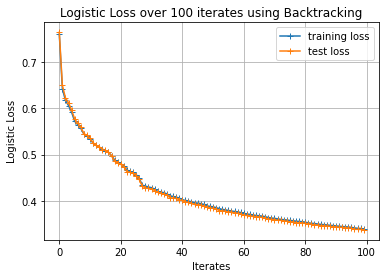

In [ ]:
plt.plot(scaled_history1,"-+")
plt.title("Logistic Loss over 100 iterates using Backtracking")
plt.xlabel("Iterates")
plt.ylabel("Logistic Loss")
plt.legend(['training loss', 'test loss'])
plt.grid(True)
plt.savefig("Scaled Backtracking.jpg",bbox_inches='tight')
files.download("Scaled Backtracking.jpg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

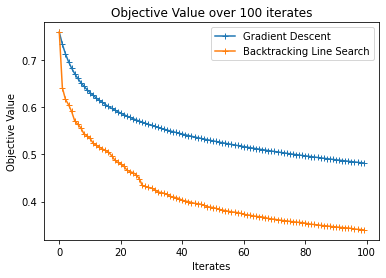

In [ ]:
plt.plot(scaled_history,"-+")
plt.plot(scaled_history1,"-+")
plt.title("Objective Value over 100 iterates")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")
plt.legend(['Gradient Descent', 'Backtracking Line Search'])


**Accuracy on Training/Test Data**

**Training Data**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(scaled_x_train,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_train) # significantly larger than that of unscaled data 

DeviceArray(0.88873333, dtype=float64)

**Test Data**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(scaled_x_test,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_test) # significantly larger than that of unscaled data 

# It seems that scaling data set improves accuracy of model
# Backtracking + scaling improves the test accuracy of logistic regresison the 
# most 

DeviceArray(0.8866, dtype=float64)

**Comparing Test Accuracy for different training set sizes**

In [ ]:
def run_backward_line_search(beta,x,y):
  iter = 100 
  initial = 1 
  alpha = 0.5 
  learning_rate = 1 
  history = []
  beta0 = beta 

  for i in range(iter):
    value,gradient = loss_value_and_grad(beta0,x,y)
    d = -gradient 
    learning_rate *= 2 
    while (all_logistic_loss(beta0 + learning_rate *d,x,y) > all_logistic_loss(beta0,x,y) + learning_rate * alpha * jnp.dot(gradient,d)):
      learning_rate *= alpha 
    
    beta0 -= gradient * learning_rate 
    history.append(value)
  
  return history,beta0

In [ ]:
def create_training_set(n_img,path):
  img_array = np.zeros((n_img,100,100))
  for k in range(n_img):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    im = np.mean(im, axis=2) # average the last channel
    img_array[k,:,:] = im
  
  
  x1_train = img_array.reshape(n_img,(100*100))
  y1_train = attribute['Male'][0:n_img].to_numpy()
  return x1_train,y1_train

In [ ]:
def create_test_set(n_img,path):
  last_img_array_testing = np.zeros((n_img,100,100))
  size = 20000-n_img 
  for k in range(size,n_img + size):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float) 
    im = resize(im, (100,100) ) 
    im = np.mean(im, axis=2) # average the last channel 
    last_img_array_testing[k-size,:,:] = im 
  
  x_test = last_img_array_testing.reshape(n_img,(100*100))
  y_test = attribute['Male'][size:].to_numpy()

  return x_test,y_test 

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
size_list = [i*1000 for i in range(1,16,2)]
print(size_list)

[1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000]


In [ ]:
accuracy = []
x_test,y_test = create_test_set(5000,path)
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
for size in size_list: 
  x_train,y_train = create_training_set(size,path)
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  history1,beta1 = run_backward_line_search(beta,x_train,y_train) 

  # save optimal beta parameter for each size 
  scaled_backtracking = beta1
  filename = 'scaled' + str(size) + '.npy'
  np.save(filename,scaled_backtracking)

  # calculate prediction accuracy 
  y_predict = prediction_vmapped(x_test,beta1) > 0.5 
  y_predict = 2*y_predict-1 
  accuracy.append(jnp.mean(y_predict == y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

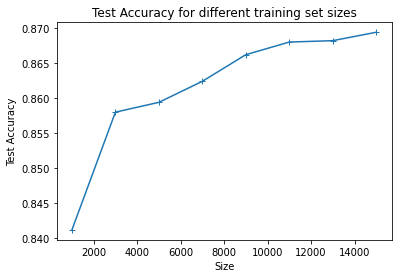

In [ ]:

plt.plot(size_list,accuracy,"-+")
plt.title("Test Accuracy for different training set sizes")
plt.xlabel("Size")
plt.ylabel("Test Accuracy")

Suppose now that you can only use 1% of the data, i.e. only the first 200 images, to train your model. What is the best model you can come up with? Is it helpful to use data-augmentation strategies? Is it helpful to use regularization strategies? Ensembling? Report the error rate and AUC of your best model (when evaluated on the last 5,000 images).

In [ ]:
# training set contains first 200 images 
x_train,y_train = create_training_set(200,path)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

In [ ]:
loss_batch = jax.vmap(loss_single,in_axes=(None,0,0))

In [ ]:
# backtracking with first 200 images only 
iter = 100
initial = 1 
alpha = 0.5 
history_200 = []
beta0 = beta 
learning_rate = 1 

for i in range(iter):
  value,gradient = loss_value_and_grad(beta0,x_train,y_train)
  d = -gradient 
  learning_rate *= 2 
  while (all_logistic_loss(beta0 + learning_rate *d,x_train,y_train) > all_logistic_loss(beta0,x_train,y_train) + learning_rate * alpha * jnp.dot(gradient,d)):
    learning_rate *= alpha 
  

  beta0 += learning_rate * d # next iterate 
  history_200.append(value)


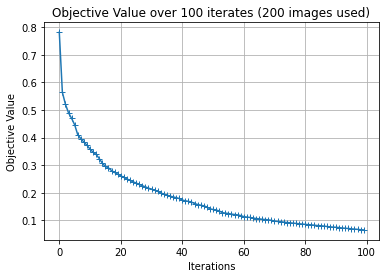

In [ ]:
plt.plot(history_200,"-+")
plt.title("Objective Value over 100 iterates (200 images used)")
plt.xlabel("Iterations")
plt.ylabel("Objective Value")
plt.grid(True)

**Training Accuracy**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(x_train,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_train) # significantly larger than that of unscaled data 

DeviceArray(0.995, dtype=float64)

**Test Accuracy**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(x_test,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_test) # signs of overfitting 

DeviceArray(0.7754, dtype=float64)

In [ ]:
@jax.jit
def loss_LR(beta,x,y):
  # compute all the indicdual losses 
  total_loss = loss_batch(beta,x,y)
  return jnp.mean(total_loss)


loss_LR_value_and_grad = jax.jit(jax.value_and_grad(loss_LR,argnums = 0))

**Stochastic Gradient Descent**

In [ ]:
epochs = 50 # number of times each image have been seen 
mini_batch_size = 50 
N = len(x_train)
loss_history = []
loss_history_end_epoch = []
beta0 = np.copy(beta)
learning_rate = 0.01
img_indices = np.arange(N)

for epoch in range(epochs): 
  # go through all mini_batches sequentially 
  total_mini_batches = N // mini_batch_size + 1 
  # randomize the indices of images 
  np.random.shuffle(img_indices)
  all_losses_within_epoch = []

  for k in range(total_mini_batches):
    batch_indices = np.arange(k*mini_batch_size,(k+1)*mini_batch_size) % N 
    batch_indices = img_indices[batch_indices]
    x_mini_batch = x_train[batch_indices]
    y_mini_batch = y_train[batch_indices]

    # stochastic gradient descent 
    value,gradient = loss_LR_value_and_grad(beta0,x_mini_batch,y_mini_batch)
    beta0 -= gradient * learning_rate 

    # record the objective value at iterate 

    loss_history.append(value)
    all_losses_within_epoch.append(value)

  
  loss_history_end_epoch.append(np.mean(all_losses_within_epoch))

Text(0, 0.5, 'Loss')

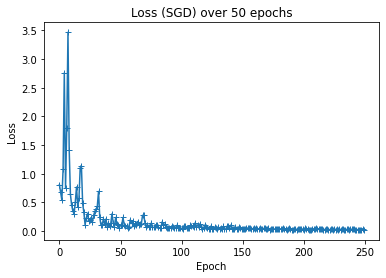

In [ ]:
from google.colab import files
plt.plot(loss_history,"-+")
plt.title("Loss (SGD) over 50 epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

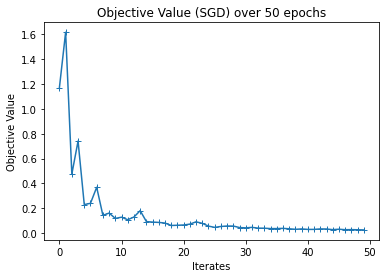

In [ ]:
from google.colab import files
plt.plot(loss_history_end_epoch,"-+")
plt.title("Objective Value (SGD) over 50 epochs")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")
plt.savefig("SGD over 50 epochs (loss at end of each epoch).jpg",bbox_inches='tight')

**Accuracy for training and test data**

**Training Data**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(x_train,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_train)

DeviceArray(1., dtype=float64)

**Test Data**

In [ ]:
y_predict = prediction_vmapped(x_test,beta0) > 0.5 
y_predict = 2*y_predict -1 
jnp.mean(y_predict == y_test) 
# huge difference between training and test accuracy 
# may need to fine tune 

DeviceArray(0.785, dtype=float64)

**Run SGD with regularization**

In [ ]:
@jax.jit
def loss_LR_regularization(beta,x,y,l):
  # compute all the indicdual losses
  total_loss = loss_batch(beta,x,y)
  regularization_term = l * jnp.linalg.norm(beta) ** 2 
  return jnp.mean(total_loss) + regularization_term 


In [ ]:
loss_LR_reg_value_and_grad = jax.value_and_grad(loss_LR_regularization)

In [ ]:
epochs = 50 # number of times each image have been seen 
mini_batch_size = 50 
N = len(x_train)
loss_reg_history = []
loss_reg_history_end_epoch = []
beta0 = np.copy(beta)
learning_rate = 0.01
img_indices = np.arange(N)

for epoch in range(epochs): 
  # go through all mini_batches sequentially 
  total_mini_batches = N // mini_batch_size + 1 
  # randomize the indices of images 
  np.random.shuffle(img_indices)
  all_losses_within_epoch = []

  for k in range(total_mini_batches):
    batch_indices = np.arange(k*mini_batch_size,(k+1)*mini_batch_size) % N 
    batch_indices = img_indices[batch_indices]
    x_mini_batch = x_train[batch_indices]
    y_mini_batch = y_train[batch_indices]

    # stochastic gradient descent 
    value,gradient = loss_LR_reg_value_and_grad(beta0,x_mini_batch,y_mini_batch,3)
    beta0 -= gradient * learning_rate 

    # record the objective value at iterate 

    loss_reg_history.append(value)
    all_losses_within_epoch.append(value)

  
  loss_reg_history_end_epoch.append(np.mean(all_losses_within_epoch))

Text(0, 0.5, 'Objective Value')

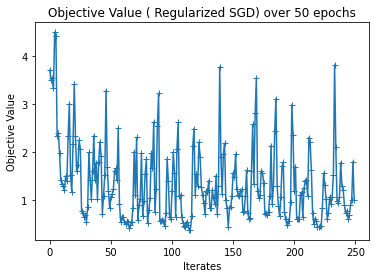

In [ ]:
from google.colab import files
plt.plot(loss_reg_history,"-+")
plt.title("Objective Value ( Regularized SGD) over 50 epochs")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")

Text(0, 0.5, 'Objective Value')

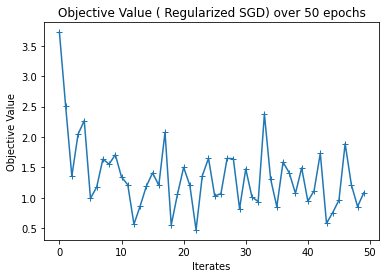

In [ ]:
plt.plot(loss_reg_history_end_epoch,"-+")
plt.title("Objective Value ( Regularized SGD) over 50 epochs")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")

**Training Accuracy**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(x_train,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_train)

DeviceArray(0.73, dtype=float64)

**Test Accuracy**

In [ ]:
y_predict = prediction_vmapped(x_test,beta0) > 0.5 
y_predict = 2*y_predict -1 
jnp.mean(y_predict == y_test) 
# huge difference between training and test accuracy 
# may need to fine tune 

DeviceArray(0.6164, dtype=float64)

In [ ]:
def run_SGD(min_batch_size,x,y,beta):
  epochs = 30 # number of times each image have been seen 
  N = len(x)
  loss_history = []
  loss_history_end_epoch = []
  beta0 = np.copy(beta)
  learning_rate = 0.01 
  img_indices = np.arange(N)

  for epoch in range(epochs): 
  # go through all mini_batches sequentially 
    total_mini_batches = N // mini_batch_size + 1 
  # randomize the indices of images 
    np.random.shuffle(img_indices)
    all_losses_within_epoch = []

    for k in range(total_mini_batches):
      batch_indices = np.arange(k*mini_batch_size,(k+1)*mini_batch_size) % N 
      batch_indices = img_indices[batch_indices]
      x_mini_batch = x[batch_indices]
      y_mini_batch = y[batch_indices]

      # stochastic gradient descent 
      value,gradient = loss_LR_value_and_grad(beta0,x_mini_batch,y_mini_batch)
      beta0 -= gradient * learning_rate 

      # record the objective value at iterate 

      loss_history.append(value)
      all_losses_within_epoch.append(value)

  
    loss_history_end_epoch.append(np.mean(all_losses_within_epoch))

  
  return loss_history_end_epoch

In [ ]:
mini_batch_lst = [20,30,40,50,60,70]

In [ ]:
import time

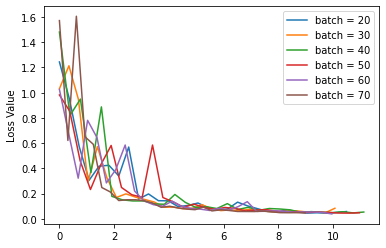

In [ ]:
for mini_batch in mini_batch_lst:
  start = time.time()
  loss_history_end_epoch = run_SGD(mini_batch,x_train,y_train,beta)
  end = time.time()
  plt.plot(np.arange(30)*(end-start),loss_history_end_epoch,label = f"batch = {mini_batch}")

plt.legend()

# choose mini_batch_size  = 20

plt.ylabel("Loss Value")
plt.savefig("SGD for different batch sizes over 30 epochs.jpg",bbox_inches='tight')

**Crop Out only the eyes of the celebrity**

In [ ]:
n_all = 20000
path = r"/content/img_celeba_small"
img_array = np.zeros((n_all, 100, 100))
for k in range(n_all):
  im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
  im = resize(im, (100,100))
  im = np.mean(im, axis=2) # average the last channel
  img_array[k,:,:] = im

In [ ]:
img_array.shape # check all images are stored in array 

(20000, 100, 100)

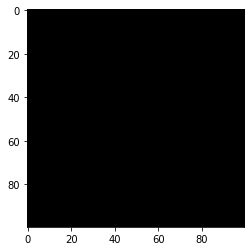

In [ ]:
all_black = np.full((100, 100), 0, dtype = np.uint8)
plt.imshow(all_black, cmap="gray")

In [ ]:
all_black.shape

(100, 100)

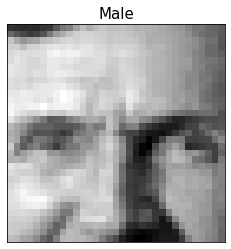

In [ ]:
cropped_eyes = img_array[20][33:66,33:66]
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labeltop=False) # labels along the bottom edge are off

plt.tick_params(
    #axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    left=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
#change Male or Female
plt.title('Female',size=15)
plt.imshow(all_black_hair, cmap="gray")
plt.imshow(cropped_eyes, cmap="gray")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

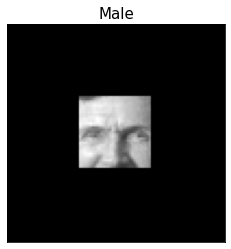

In [ ]:
#from google.colab import files
all_black_eyes = all_black.copy()
all_black_eyes[33:66,33:66] = img_array[20][33:66,33:66]
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labeltop=False) # labels along the bottom edge are off

plt.tick_params(
    #axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    left=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
#change Male or Female
plt.title('Male',size=15)
plt.imshow(all_black_eyes, cmap="gray")
#plt.imshow(cropped_eyes, cmap="gray")
plt.savefig("eye1.jpg",bbox_inches='tight')
files.download("eye1.jpg") 

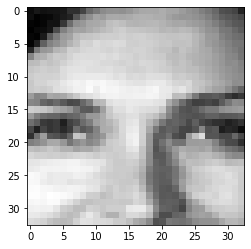

In [ ]:
cropped_eyes = img_array[5678][33:66,33:66]
plt.imshow(cropped_eyes, cmap="gray")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

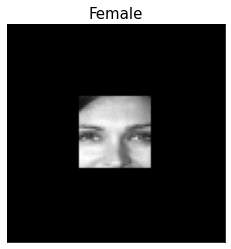

In [ ]:
from google.colab import files
all_black_eyes = all_black.copy()
all_black_eyes[33:66,33:66] = img_array[5678][33:66,33:66]
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labeltop=False) # labels along the bottom edge are off

plt.tick_params(
    #axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    left=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
#change Male or Female
plt.title('Female',size=15)
plt.imshow(all_black_eyes, cmap="gray")
#plt.imshow(cropped_eyes, cmap="gray")
plt.savefig("eye2.jpg",bbox_inches='tight')
files.download("eye2.jpg") 

**Crop only the eyes out**

In [ ]:
from PIL import Image
import os
from pathlib import Path

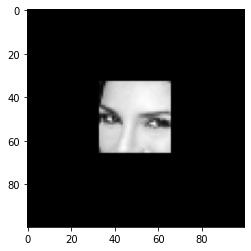

In [ ]:
all_black_eyes = all_black.copy()
all_black_eyes[33:66,33:66] = img_array[0][33:66,33:66]
img = all_black_eyes 
plt.imshow(img, cmap="gray")
img = Image.fromarray(img)
img.save('/content/drive/MyDrive/DSA4212/img.jpeg')

In [ ]:
for i in range(len(img_array)):
  all_black_eyes = all_black.copy()
  all_black_eyes[33:66,33:66] = img_array[i][33:66,33:66]
  img = all_black_eyes 
  img = Image.fromarray(img)
  num = '' 
  idx = i + 1
  if idx < 10: 
    num = '0' * 5
  elif idx < 100: 
    num = '0' * 4
  elif idx < 1000: 
    num = '0' * 3 
  elif idx < 10000: 
    num = '0' * 2 
  else:
    num = '0'

  print(idx)
  name = '/content/drive/MyDrive/DSA4212/eyepowering/' + num + str(idx) + '.jpg'
  img.save(name)
  img_array[i] = img 

Streaming output truncated to the last 5000 lines.
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
1

In [ ]:
print(img_array[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
!zip -r /content/drive/MyDrive/DSA4212/eyepowering.zip /content/drive/MyDrive/DSA4212/eyepowering 

^C


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/DSA4212/eyepowering.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Building a logistic Model using only the eyes**

In [ ]:
!unzip /content/drive/MyDrive/DSA4212/eyepowering.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015001.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015002.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015003.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015004.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015005.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015006.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015007.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015008.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015009.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015010.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015011.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015012.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015013.jpg  
  inflating: content/drive/MyDrive/DSA4212/eyepowering/015014.jpg

In [ ]:
path = r"/content/content/drive/MyDrive/DSA4212/eyepowering"
all_img = [f for f in os.listdir(path) 
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")]

# sort the images by alphabetical order 
# !!!! VERY IMPORTANT in order to be consistent with the labels contained in celeba.csv !!!!
all_img.sort()
nb_img = len(all_img)
print("Number of images:", nb_img)

#let us keep only the relevant attributes
attribute = attribute[:20000]

Number of images: 20000


In [ ]:
print(all_img)

['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000071.jpg', '0000

In [ ]:
n_img = 15000
img_array = np.zeros((n_img, 100,100))
for k in range(n_img):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    #im = np.mean(im, axis=2) # average the last channel
    img_array[k,:,:] = im

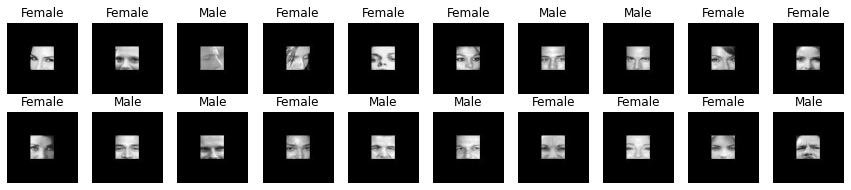

In [ ]:
plt.figure(figsize=(15,3))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100
    im = resize(im, (100,100) )
    #transform to black and white by averaging the 3 color channels
    #im = np.mean(im, axis=2)
    #scale pixel intensity to [0,1] by divising by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255., cmap="gray")
    plt.axis("off")

    is_male = attribute["Male"][k]
    if is_male == 1:
        plt.title("Male")
    else:
        plt.title("Female")

In [ ]:
eye_x_train = img_array.reshape(15000,(100*100))
eye_y_train = attribute['Male'][0:15000].to_numpy()

In [ ]:
n_img = 5000 
last_img_array_testing = np.zeros((n_img, 100,100)) 
for k in range(15000,n_img+15000): 
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float) 
    im = resize(im, (100,100) ) 
    #im = np.mean(im, axis=2) # average the last channel 
    last_img_array_testing[k-15000,:,:] = im

In [ ]:
eye_x_test = last_img_array_testing.reshape(5000,(100*100))
y_test = attribute['Male'][15000:].to_numpy()

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Scaled Data**

In [ ]:
from sklearn.preprocessing import StandardScaler 
#scaling of X data ( both test and train) 
scaler = StandardScaler() 
# transform data 
eye_x_train = scaler.fit_transform(eye_x_train) 

In [ ]:
#scaling of X data ( both test and train) 
scaler = StandardScaler() 
# transform data 
eye_x_test = scaler.fit_transform(eye_x_test) 

**Backtracking Line Search**

In [ ]:
iter = 200
initial = 1 
alpha = 0.5 
eye_history = []
beta0 = beta 
learning_rate = 1
test_history = [] 

for i in range(iter):
  value,gradient = loss_value_and_grad(beta0,eye_x_train,y_train)
  d = -gradient 
  learning_rate *= 2 
  while (all_logistic_loss(beta0 + learning_rate *d,eye_x_train,y_train) > all_logistic_loss(beta0,eye_x_train,y_train) + learning_rate * alpha * jnp.dot(gradient,d)):
    learning_rate *= alpha 
  
  #value2,gradient2 = loss_value_and_grad(beta0,scaled_x_test,y_test)
  beta0 += learning_rate * d # next iterate 
  eye_history.append(value)
  #test_history.append(value2)

In [ ]:
print(eye_history)

[DeviceArray(0.75397084, dtype=float64), DeviceArray(0.68415712, dtype=float64), DeviceArray(0.64856594, dtype=float64), DeviceArray(0.59850541, dtype=float64), DeviceArray(0.56767982, dtype=float64), DeviceArray(0.54784434, dtype=float64), DeviceArray(0.52631095, dtype=float64), DeviceArray(0.51280328, dtype=float64), DeviceArray(0.49613608, dtype=float64), DeviceArray(0.48682167, dtype=float64), DeviceArray(0.47335165, dtype=float64), DeviceArray(0.46257258, dtype=float64), DeviceArray(0.45555615, dtype=float64), DeviceArray(0.44610587, dtype=float64), DeviceArray(0.43837693, dtype=float64), DeviceArray(0.43284574, dtype=float64), DeviceArray(0.42556728, dtype=float64), DeviceArray(0.41589303, dtype=float64), DeviceArray(0.40969473, dtype=float64), DeviceArray(0.4046337, dtype=float64), DeviceArray(0.40023141, dtype=float64), DeviceArray(0.39701634, dtype=float64), DeviceArray(0.39270251, dtype=float64), DeviceArray(0.38536399, dtype=float64), DeviceArray(0.38300215, dtype=float64), 

In [ ]:
print(scaled_history1)

[DeviceArray(0.75991002, dtype=float64), DeviceArray(0.64196524, dtype=float64), DeviceArray(0.61718707, dtype=float64), DeviceArray(0.60599021, dtype=float64), DeviceArray(0.59152662, dtype=float64), DeviceArray(0.57192559, dtype=float64), DeviceArray(0.56448812, dtype=float64), DeviceArray(0.55659221, dtype=float64), DeviceArray(0.54422856, dtype=float64), DeviceArray(0.53968475, dtype=float64), DeviceArray(0.53407117, dtype=float64), DeviceArray(0.52418681, dtype=float64), DeviceArray(0.51976449, dtype=float64), DeviceArray(0.51564043, dtype=float64), DeviceArray(0.51177237, dtype=float64), DeviceArray(0.50875686, dtype=float64), DeviceArray(0.50493499, dtype=float64), DeviceArray(0.49776797, dtype=float64), DeviceArray(0.48851246, dtype=float64), DeviceArray(0.48319878, dtype=float64), DeviceArray(0.48036163, dtype=float64), DeviceArray(0.47494366, dtype=float64), DeviceArray(0.46677039, dtype=float64), DeviceArray(0.46363959, dtype=float64), DeviceArray(0.46136919, dtype=float64),

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

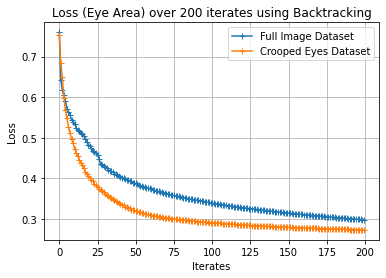

In [ ]:
from google.colab import files
plt.plot(scaled_history1,"-+")
plt.plot(eye_history,"-+")
plt.title("Loss (Eye Area) over 200 iterates using Backtracking")
plt.xlabel("Iterates")
plt.ylabel("Loss")
plt.legend(['Full Image Dataset', 'Crooped Eyes Dataset'])
plt.grid(True)
plt.savefig("Full Image VS Eyes Only.jpg",bbox_inches='tight')
files.download("Full Image VS Eyes Only.jpg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

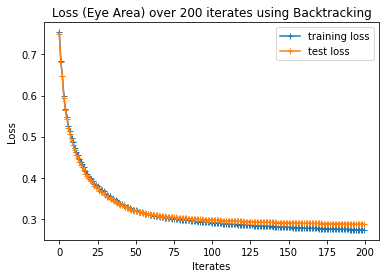

In [ ]:
from google.colab import files
plt.plot(eye_history,"-+")
plt.plot(test_history,"-+")
plt.title("Loss (Eye Area) over 200 iterates using Backtracking")
plt.xlabel("Iterates")
plt.ylabel("Loss")
plt.legend(['training loss', 'test loss'])
# Over 100 iterates, back tracking finds optimal beta in 100 iterates 
plt.savefig("Eye Area Backtracking.jpg",bbox_inches='tight')
files.download("Eye Area Backtracking.jpg") 

In [ ]:
scaled_eye_backtracking = beta0 
np.save('scaled_eye_backtracking.npy',scaled_eye_backtracking)

**Training Accuracy (Eye Model)**

In [ ]:
# True False prediction 
Y_predictions = prediction_vmapped(scaled_x_train,beta0) > 0.5 
# +1/-1 predictions 
# 2 * True = 1 , 2 * False = 0 
Y_predictions = 2 * Y_predictions -1 
jnp.mean(Y_predictions == y_train)

DeviceArray(0.8944, dtype=float64)

**Test Accuracy**

In [ ]:
y_predict = prediction_vmapped(scaled_x_test,beta0) > 0.5 
y_predict = 2*y_predict -1 
jnp.mean(y_predict == y_test) 

DeviceArray(0.887, dtype=float64)

In [ ]:
scaler = StandardScaler() 
# transform data 
scaled_loaded = scaler.fit_transform(loaded) 

In [ ]:
y_predict = prediction_vmapped(scaled_loaded,beta0) > 0.5 
y_predict = 2*y_predict -1 
jnp.mean(y_predict == y_test) 

DeviceArray(0.8844, dtype=float64)